# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
# your code here

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_excel('Online Retail.xlsx')

In [4]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

* Data Cleaning

In [5]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool

In [6]:
#checking the shape of duplicates and removing them

df_duplicates = df[df.duplicated()]  
df_duplicates.shape

(5268, 8)

In [7]:
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [8]:
df=df.drop_duplicates()

In [9]:
df.shape

(536641, 8)

In [10]:
#checkig for null values but we do not remove them as we need their sales data for our analysis

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [12]:
#Quantity column has some negative values so we are using absolute func to convert them 

df['Quantity']=abs(df['Quantity'])

In [13]:
# We need total sales data which is missing from our table, so we create a column for Sales

df['Sales']=df['Quantity']*df['UnitPrice']

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [15]:
# Rearranging Columns according to our logic/covenience

df=df[['CustomerID','InvoiceNo','Quantity','Sales','InvoiceDate','StockCode','Description','Country']]

In [16]:
df.head()


,CustomerID,InvoiceNo,Quantity,Sales,InvoiceDate,StockCode,Description,Country
0,17850.0,536365,6,15.30,2010-12-01 08:26:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,17850.0,536365,6,20.34,2010-12-01 08:26:00,71053,WHITE METAL LANTERN,United Kingdom
2,17850.0,536365,8,22.00,2010-12-01 08:26:00,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,17850.0,536365,6,20.34,2010-12-01 08:26:00,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,17850.0,536365,6,20.34,2010-12-01 08:26:00,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


* Analysis of our Data Set

1. Sales over different Countries

In [17]:
# Grouping Countries by Sales value

Country_Sales=df.groupby(['Country'])['Sales'].sum().sort_values(ascending=False)
                                                            
Country_Sales

Country
United Kingdom          9792111.764
EIRE                     303287.660
Netherlands              286231.140
Germany                  235847.330
France                   221933.630
Australia                139897.850
Spain                     68361.090
Switzerland               57772.150
Belgium                   41481.720
Sweden                    40150.250
Japan                     39492.120
Portugal                  38063.130
Norway                    37167.420
Singapore                 33438.190
Finland                   22765.420
Hong Kong                 21057.760
Channel Islands           20804.690
Denmark                   19142.540
Italy                     18075.970
Cyprus                    14146.940
Austria                   10243.040
Israel                     8356.850
Poland                     7456.160
USA                        5429.860
Greece                     4810.520
Unspecified                4740.940
Iceland                    4310.000
Canada              

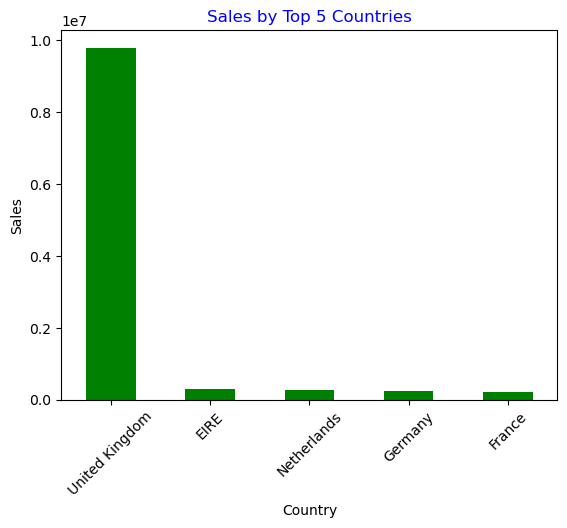

In [18]:
#Top 5 countries 

Country_Sales[0:5].plot(kind='bar',color='green')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.title('Sales by Top 5 Countries',c='blue')
plt.show()

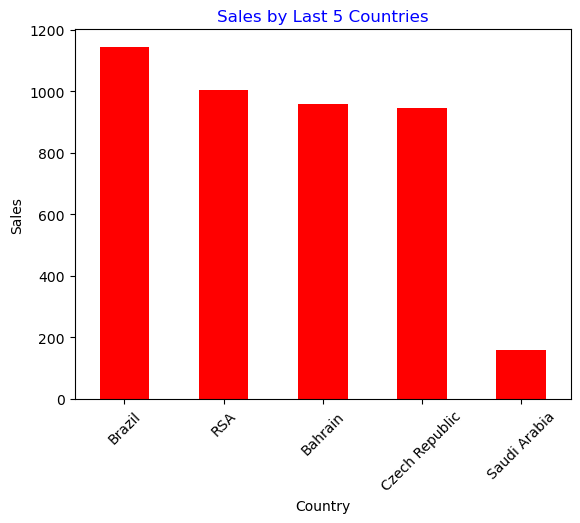

In [19]:
Country_Sales[-5:].plot(kind='bar',color='red')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.title('Sales by Last 5 Countries',c='blue')
plt.show()

2. Yearly Analysis of Sales

In [20]:
# Extracting Year and Month from the given InvoiceData

df['Year']=pd.to_datetime(df['InvoiceDate']).dt.year
df['Month']=pd.to_datetime(df['InvoiceDate']).dt.month


In [21]:
#Grouping Sales by Year

Year_Sales=df.groupby('Year')['Sales'].sum().sort_values(ascending=False)


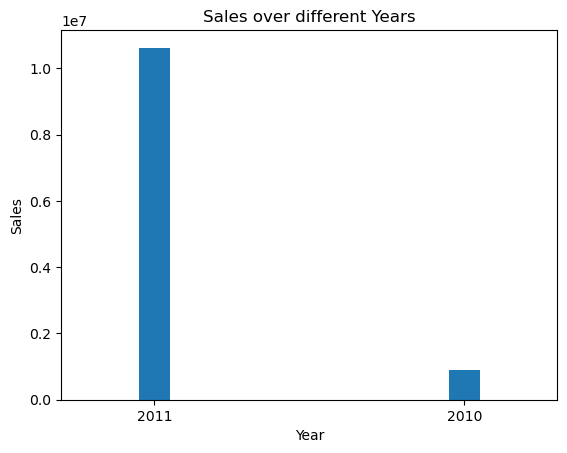

In [22]:
Year_Sales.plot(kind='bar',width=0.1)
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.title('Sales over different Years')
plt.show()

* Inference - From the above graph, we observe that the sales for 2010 were very low compared to 2010
* Let us understand why it is so by looking at the monthly trend of sales in 2010

In [23]:
# Grouping of Sales by Month

Monthly_Sales=df.groupby(['Year','Month'])['Sales'].sum()

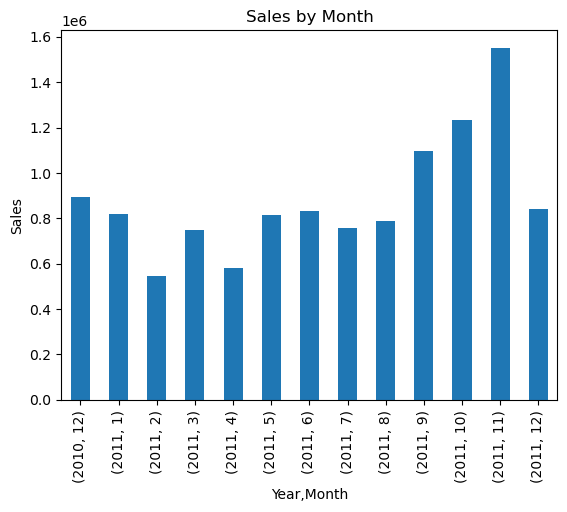

In [24]:
Monthly_Sales.plot(kind='bar')
plt.ylabel('Sales')
plt.title('Sales by Month')
plt.show()

* Inference - From the above graph, we observe that only December sales were available in the Dataset.
* After a steady rise over sales over months, December 2011 saw a huge reduction in Sales.
* Let us try and understand why

In [25]:
# Getting all the Sales done in December 2011

Dec_2011_Sales=df[(df['Year']==2011) & (df['Month']==12)]


In [26]:
#Checking for how many days the invoice was present

Dec_2011_Sales['InvoiceDate'].dt.date.nunique()

8

* Inference - From above, we can see that only on 8 unique days in December 2011 the invoices were available in the Dataset.

* Sales by Day of the Week

In [27]:
# extracting day of week and we get values from 0 to 6 

df['DayofWeek']=pd.to_datetime(df['InvoiceDate']).dt.weekday

In [28]:
day_mapping={0:'Monday',
            1:'Tuesday',
            2:'Wednesday',
            3:'Thursday',
            4:'Friday',
            5:'Saturday',
            6:'Sunday'}

In [29]:
# mapping Day of Week for better readability

df['DayofWeek']=df['DayofWeek'].map(day_mapping)

In [30]:
# Grouping Days over Sales

Day_Sales=df.groupby('DayofWeek')['Sales'].sum().sort_values(ascending=False)

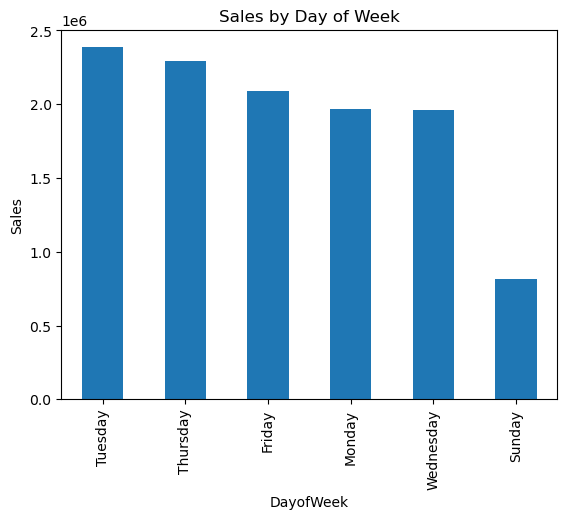

In [31]:
Day_Sales.plot(kind='bar')
plt.ylabel('Sales')
plt.title('Sales by Day of Week')
plt.show()

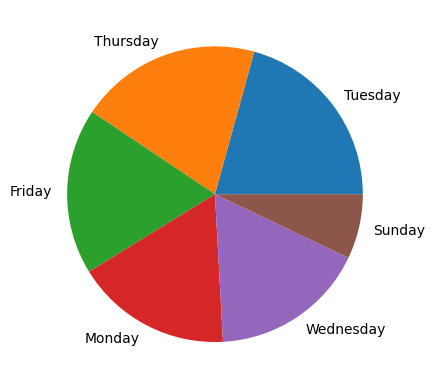

In [32]:
plt.pie(Day_Sales,labels=Day_Sales.index)
plt.show()

In [33]:
df['DayofWeek'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Sunday', 'Monday', 'Tuesday'],
      dtype=object)

In [34]:
new_df1=df.groupby(['StockCode','Description'])['Quantity','Sales'].sum().sort_values(by='Sales',ascending=False)

/var/folders/vh/gh16qh4s1g3g_f529chjnz6h0000gn/T/ipykernel_2296/3017908389.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_df1=df.groupby(['StockCode','Description'])['Quantity','Sales'].sum().sort_values(by='Sales',ascending=False)


In [35]:
new_df1

Quantity      Sales
StockCode Description                                     
23843     PAPER CRAFT , LITTLE BIRDIE    161990  336939.20
AMAZONFEE AMAZON FEE                         34  249042.68
M         Manual                          11056  224534.73
DOT       DOTCOM POSTAGE                    709  206252.06
22423     REGENCY CAKESTAND 3 TIER        14717  183853.59
...                                         ...        ...
84279P    check                             104       0.00
          found                              84       0.00
21817     check                               8       0.00
84313B    Damaged                            32       0.00
B         Adjust bad debt                     3  -11062.06

[4792 rows x 2 columns]

In [36]:
#grouping by products by Quantity sold

Product_Quantity=df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)


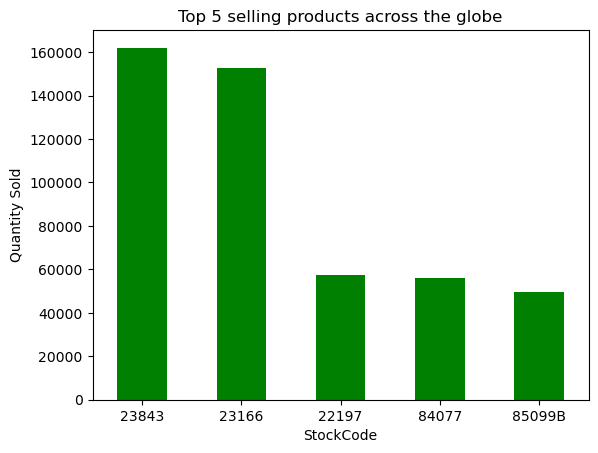

In [37]:
# Top 5 selling prodcuts

Product_Quantity[:5].plot(kind='bar',color='green')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=0)
plt.title('Top 5 selling products across the globe')
plt.show()


# Final Conclusions from the Analysis we've done so far

1. Sales is highest in United Kingdon and least in Saudi Arabia

2. Observed a huge difference in sales between the Top 1 country, United Kingdom(UK) and the second top              country,EIRE (Ireland) - from which we can probably say that the online retail business is majorly concentrated    in UK and probably is the home of the business.

3. Sales for 2010 were very low compared to 2011, as only the sales for December 2010 were available in the dataset. This could mean that probably the business was started either in Dec'2010 or simply the data was just not available or loaded into the dataset.

4. Also after steady increase in Sales over months, Dec'2011 saw a steep decline in Sales. This is because only Sales data for about 8 days was available in the Dataset.

5. Also it is observed that there were no Sales on any Saturday. This could mean that the online retail business might be closed for business on Saturdays.

